# New York City Citywide Mobility Survey 2019
# Clustering

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Preprocessing data
#### 3. The elbow technique
#### 4. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'/Users/peimei/11-2023 New York City Citywide Mobility Survey 2019'

# Join the path using 'os.path.join'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'Citywide_Mobility_Survey_Trips_Person_Vehicle.csv')

# Read the CSV file into a DataFrame
trips_person_vehicle = pd.read_csv(file_path,index_col = [0],low_memory=False)

In [4]:
trips_person_vehicle.shape

(74923, 43)

In [5]:
trips_person_vehicle.head()

,hh_id,trip_weight,home_cms_zone,survey_mode,person_id,day_num,travel_date,travel_date_dow,trip_id,trip_num,...,d_purpose_category_imputed,o_location_type_imputed,d_location_type_imputed,o_congestion,d_congestion,age,jobs_count,industry,distance_category,vehicle_num
0,19000235,0.0,Northern Bronx,smartphone app,1900023501,1,2019-05-30,Thursday,1900023501001,1,...,Work,4,2,1,0,35-44,1,Financial services,>3 miles,2.0
1,19000235,0.0,Northern Bronx,smartphone app,1900023501,3,2019-06-01,Saturday,1900023501004,4,...,Home,2,1,0,0,35-44,1,Financial services,>3 miles,2.0
2,19000235,0.0,Northern Bronx,smartphone app,1900023501,4,2019-06-02,Sunday,1900023501013,13,...,Meal,4,4,0,0,35-44,1,Financial services,>3 miles,2.0
3,19000235,0.0,Northern Bronx,smartphone app,1900023501,4,2019-06-02,Sunday,1900023501014,14,...,Meal,4,4,0,0,35-44,1,Financial services,>3 miles,2.0
4,19000235,0.0,Northern Bronx,smartphone app,1900023501,5,2019-06-03,Monday,1900023501016,16,...,Meal,4,4,0,0,35-44,1,Financial services,1-3 miles,2.0


### 2. Preprocessing Data

### Merge df 'Trips_Person_Vehicle' with df 'Household'

In [6]:
# import dataframe 'Household'

# Join the path using 'os.path.join'
file_path = os.path.join(path, '02 Data', 'Original Data', 'Citywide_Mobility_Survey_-_Household_Survey_2019_20231108.csv')

# Define list of variables to be imported
vars_list = ['hh_id','num_people']

# Read the CSV file into a DataFrame
hh = pd.read_csv(file_path, sep=";", index_col = False, low_memory=False, usecols = vars_list)

In [7]:
hh.head()

,hh_id,num_people
0,191547753,3
1,19959674,8
2,199459719,2
3,197439069,1
4,199703066,1


In [8]:
hh.describe()

,hh_id,num_people
count,3.346000e+03,3346.000000
mean,2.507183e+07,2.476390
std,3.078091e+07,1.422501
min,1.900024e+07,1.000000
25%,1.926902e+07,1.000000
50%,1.952194e+07,2.000000
75%,1.979005e+07,3.000000
max,1.999892e+08,11.000000


In [9]:
# Merge dataframes

trips_person_vehicle_hh = trips_person_vehicle.merge(hh, on = 'hh_id', how = 'left')
trips_person_vehicle_hh.shape

(74923, 44)

### Save a subset of only necessary numeric values for clustering

In [10]:
df = trips_person_vehicle_hh[['hh_id','trip_duration_min','trip_distance_mile','vehicle_num','num_people']]

In [11]:
df.head()

,hh_id,trip_duration_min,trip_distance_mile,vehicle_num,num_people
0,19000235,11.1,13.4,2.0,5
1,19000235,9.1,3.7,2.0,5
2,19000235,17.9,9.8,2.0,5
3,19000235,23.4,11.1,2.0,5
4,19000235,13.7,2.5,2.0,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74923 entries, 0 to 74922
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hh_id               74923 non-null  int64  
 1   trip_duration_min   74923 non-null  float64
 2   trip_distance_mile  74923 non-null  float64
 3   vehicle_num         74923 non-null  float64
 4   num_people          74923 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 3.4 MB


### 3. The elbow technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/peimei/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peimei/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peimei/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peimei/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

[-8.082709936787654e+19,
 -2.592820987202406e+16,
 -1.1442379863286438e+16,
 -6771595611327338.0,
 -4018757924737118.5,
 -2723088220608712.0,
 -1905855247157649.2,
 -1374686191718362.5,
 -1042319817223968.6]

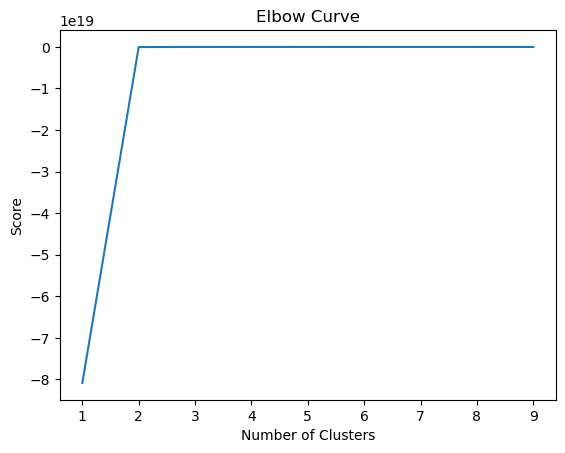

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to two on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is two.

### 4. k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [17]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/peimei/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [18]:
df['clusters'] = kmeans.fit_predict(df)

/Users/peimei/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/nk/wd3333zj0f33cp4dc4rz3jxh0000gn/T/ipykernel_29936/1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [19]:
df.head()

,hh_id,trip_duration_min,trip_distance_mile,vehicle_num,num_people,clusters
0,19000235,11.1,13.4,2.0,5,0
1,19000235,9.1,3.7,2.0,5,0
2,19000235,17.9,9.8,2.0,5,0
3,19000235,23.4,11.1,2.0,5,0
4,19000235,13.7,2.5,2.0,5,0


In [20]:
df['clusters'].value_counts()

0    72204
1     2719
Name: clusters, dtype: int64

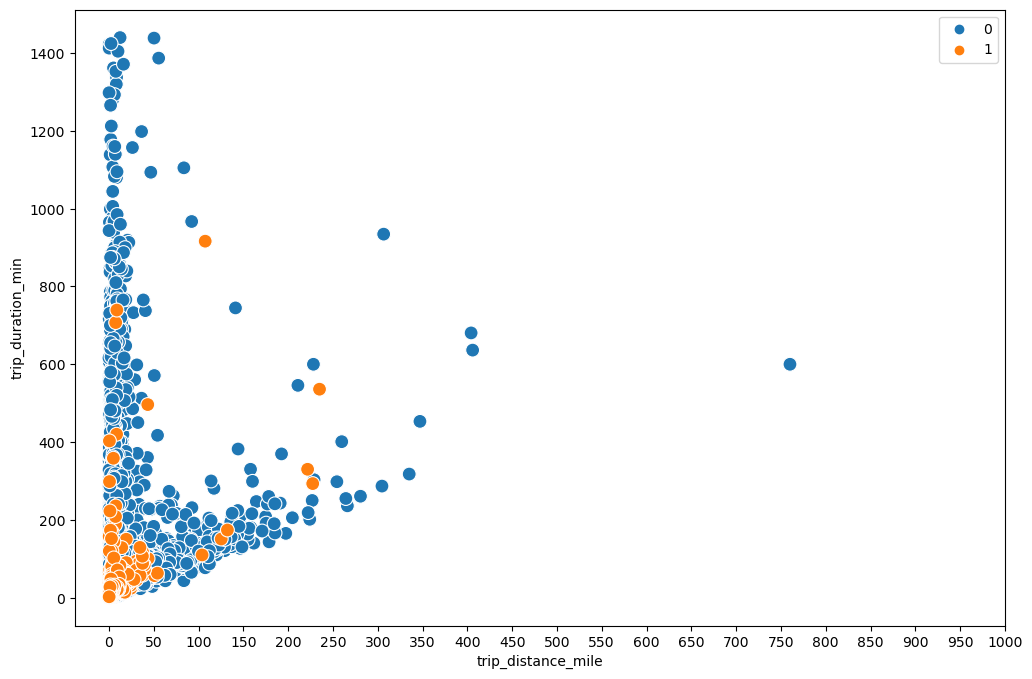

In [21]:
# Plot the clusters for the "trip_distance_mile" and "trip_duration_min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['trip_distance_mile'], y=df['trip_duration_min'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('trip_distance_mile') # Label x-axis.
plt.ylabel('trip_duration_min') # Label y-axis.
plt.xticks(np.arange(0, 1001, step=50)) 
plt.show()

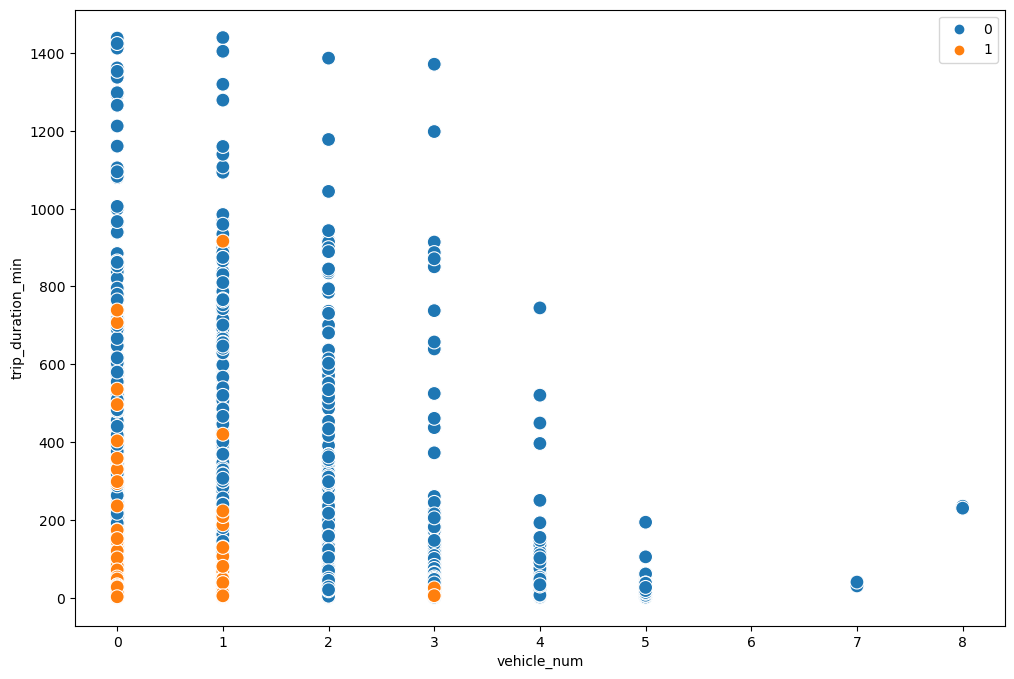

In [22]:
# Plot the clusters for the "num_vehicles" and "trip_duration_min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['vehicle_num'], y=df['trip_duration_min'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('vehicle_num') 
plt.ylabel('trip_duration_min') 
plt.show()

In [23]:
df_orange = df[df['clusters']== 1]
df_orange['vehicle_num'].value_counts(dropna = False)

0.0    1907
1.0     805
3.0       7
Name: vehicle_num, dtype: int64

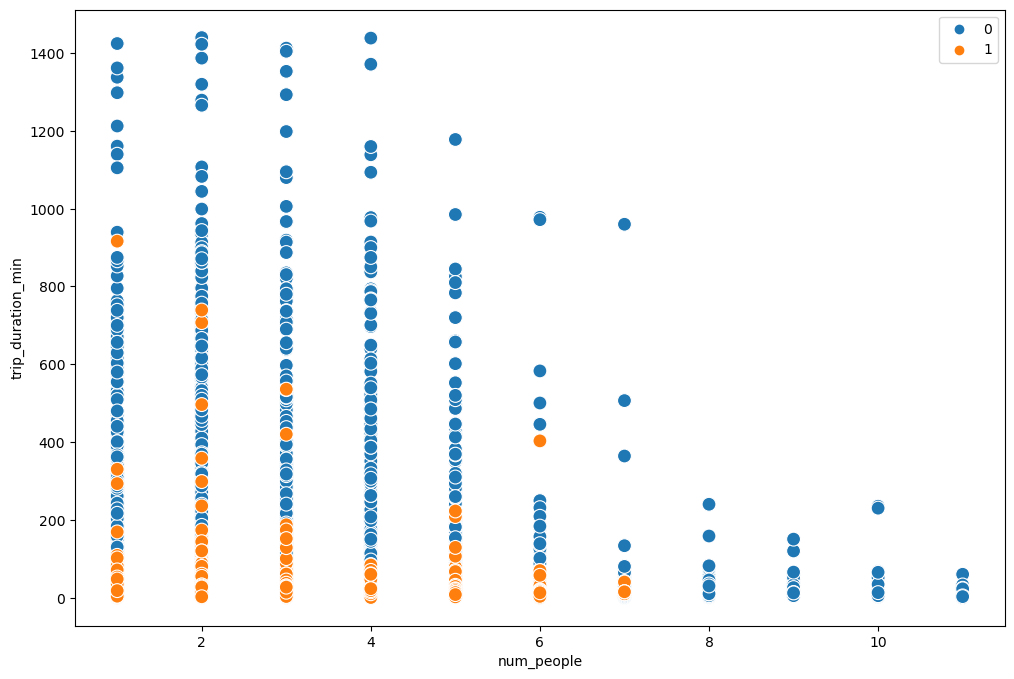

In [24]:
# Plot the clusters for the "num_people" and "trip_duration_min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['num_people'], y=df['trip_duration_min'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('num_people') 
plt.ylabel('trip_duration_min') 
plt.show()

In [25]:
df.loc[df['clusters'] == 1, 'cluster'] = 'orange'
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'

/var/folders/nk/wd3333zj0f33cp4dc4rz3jxh0000gn/T/ipykernel_29936/727457947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 1, 'cluster'] = 'orange'


### Task: Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

### Answer: 
1. The orange cluster roughly represents the trips that are within 50 miles distance and do not last longer than 4 hours. Most of these trips were done by households that have no more than 5 people. 
2. No obvious relationship is observed between the vehicle ownership and the trip duration.
3. Summing up what I have observed in the three plots above, none of the variables has a direct impact on the trip distance.

In [26]:
df.groupby('cluster').agg({'trip_distance_mile':['mean', 'median'], 
                         'trip_duration_min':['mean', 'median'], 
                         'vehicle_num':['mean', 'median'],
                          'num_people':['mean', 'median']})

trip_distance_mile        trip_duration_min        vehicle_num         \
                      mean median              mean median        mean median   
cluster                                                                         
blue              3.647220    1.0         22.580111   11.2    0.768780    1.0   
orange            2.694399    0.7         18.451894   10.4    0.303788    0.0   

        num_people         
              mean median  
cluster                    
blue      2.602847    2.0  
orange    2.404193    2.0

### My findings:
1. The orange cluster has a shorter average trip duration and a shorter trip distance. 
2. The vehicle ownership level of the orange cluster is lower than the blue cluster. Furthermore, a large portion of the households in the orange cluster don't have a car.   
3. The size of household doesn't seem to matter much.

### Task: Propose what these results could be useful for in future steps of an analytics pipeline.

### Answer:

The results suggest that the trip distance, vehicle ownership per household and size of household cannot explain the variance in trip duration. We will need to look into other variables to investigate further. The transportation mode, for instance, might be a decisive variable in predicting how long the trip will be. 

In [27]:
# Merge two dataframes
trips_person_vehicle_hh['clusters'] = df['clusters']
trips_person_vehicle_hh.shape

(74923, 45)

In [28]:
# Export df as csv

trips_person_vehicle_hh.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Citywide_Mobility_Survey_Trips_Person_Vehicle_Clusters.csv'))